In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import os
import calendar

In [18]:
csv_path = Path("seattle-neighborhoods.csv")
df = pd.read_csv(csv_path)

In [19]:
df.head()
df = df.fillna(method="pad")
df.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,"Seattle, WA",February 2012,$320K,6.7%,-5.9%,495,11.7%,14.6%,779,21.3%,-11.5%,"1,928",-4.8%,-33.9%,62.0,2.0,-12.0,97.2%,0.3%,0.8%
1,"Seattle, WA",March 2012,$350K,9.4%,0.0%,670,35.4%,0.8%,998,28.1%,-5.9%,"1,930",0.1%,-34.7%,40.0,-22.0,-26.0,98.1%,0.9%,1.3%
2,"Seattle, WA",April 2012,$379K,8.3%,7.2%,778,16.1%,14.1%,"1,037",3.9%,-7.9%,"1,944",0.7%,-36.9%,30.0,-10.0,-13.0,98.5%,0.4%,1.2%
3,"Seattle, WA",May 2012,$380K,0.3%,9.4%,890,14.4%,28.6%,"1,077",3.9%,4.9%,"1,952",0.4%,-36.7%,19.0,-11.0,-15.0,99.2%,0.7%,1.9%
4,"Seattle, WA",June 2012,$380K,0.0%,8.1%,927,4.2%,13.6%,"1,014",-5.8%,-6.2%,"1,969",0.9%,-38.4%,17.0,-2.0,-20.0,99.3%,0.1%,2.0%


In [20]:
seattle_df = df.drop(df[df["Region"] != "Seattle, WA"].index)
seattle_df["Region"] = seattle_df["Region"].str.replace("Seattle, WA", "Seattle")
seattle_df.set_index("Region", inplace=True)
seattle_df.dtypes

Month of Period End           object
Median Sale Price             object
Median Sale Price MoM         object
Median Sale Price YoY         object
Homes Sold                    object
Homes Sold MoM                object
Homes Sold YoY                object
New Listings                  object
New Listings MoM              object
New Listings YoY              object
Inventory                     object
Inventory MoM                 object
 Inventory YoY                object
Days on Market               float64
Days on Market MoM           float64
Days on Market YoY           float64
Average Sale To List          object
Average Sale To List MoM      object
Average Sale To List YoY      object
dtype: object

In [21]:
neighborhood_df = df.drop(df[df["Region"] == "Seattle, WA"].index)
neighborhood_df.head()
neighborhood_df["Region"] = neighborhood_df["Region"].str.split("-")
#neighborhood_df["Month of Period End"] = neighborhood_df["Month of Period End"].str.split(" ")


neighborhood_df["Region"] = neighborhood_df["Region"].str[1]
#neighborhood_df["Year"]= neighborhood_df["Month of Period End"].str[1]
#neighborhood_df["Month of Period End"] = neighborhood_df["Month of Period End"].str[0]

#name_to_num = {name: num for num, name in enumerate(calendar.month_name) if num}
#name_to_num
#neighborhood_df["Month of Period End"] = neighborhood_df["Month of Period End"].apply(lambda x: name_to_num[x])


neighborhood_df.set_index("Region", inplace=True)

pd.to_datetime(neighborhood_df["Month of Period End"])

neighborhood_df.head()

,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
Region,,,,,,,,,,,,,,,,,,,
Adams,February 2012,$348K,-0.7%,3.7%,40,-7.0%,25.0%,28,-15.2%,-37.8%,30,-3.2%,-37.5%,40.0,-10.0,-17.0,98.6%,0.2%,1.0%
Adams,March 2012,$347K,-0.1%,4.4%,40,0.0%,11.1%,43,53.6%,-33.8%,25,-16.7%,-50.0%,49.0,10.0,-6.0,98.6%,-0.1%,0.3%
Adams,April 2012,$325K,-6.3%,-6.7%,47,17.5%,6.8%,65,51.2%,20.4%,37,48.0%,-22.9%,46.0,-4.0,27.0,98.7%,0.2%,0.1%
Adams,May 2012,$332K,2.0%,-8.4%,56,19.1%,21.7%,71,9.2%,26.8%,32,-13.5%,-37.3%,37.0,-9.0,8.0,99.2%,0.4%,0.7%
Adams,June 2012,$328K,-1.1%,-2.2%,63,12.5%,61.5%,68,-4.2%,41.7%,25,-21.9%,-50.0%,16.0,-21.0,-23.0,99.0%,-0.2%,-0.6%


In [22]:
#neighborhood_df.replace({"Median Sale Price": {'$': ''}}, regex=True)

neighborhood_df["Median Sale Price"] = neighborhood_df["Median Sale Price"].str.replace("$", "")
dictionary = {'%':'', 'K':'', '$' : '', ',' : ''} 
neighborhood_df.replace(dictionary, regex=True, inplace=True)
neighborhood_df.head()

,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
Region,,,,,,,,,,,,,,,,,,,
Adams,February 2012,348,-0.7,3.7,40,-7.0,25.0,28,-15.2,-37.8,30,-3.2,-37.5,40.0,-10.0,-17.0,98.6,0.2,1.0
Adams,March 2012,347,-0.1,4.4,40,0.0,11.1,43,53.6,-33.8,25,-16.7,-50.0,49.0,10.0,-6.0,98.6,-0.1,0.3
Adams,April 2012,325,-6.3,-6.7,47,17.5,6.8,65,51.2,20.4,37,48.0,-22.9,46.0,-4.0,27.0,98.7,0.2,0.1
Adams,May 2012,332,2.0,-8.4,56,19.1,21.7,71,9.2,26.8,32,-13.5,-37.3,37.0,-9.0,8.0,99.2,0.4,0.7
Adams,June 2012,328,-1.1,-2.2,63,12.5,61.5,68,-4.2,41.7,25,-21.9,-50.0,16.0,-21.0,-23.0,99.0,-0.2,-0.6


In [23]:
seattle_df["Median Sale Price"] = seattle_df["Median Sale Price"].str.replace("$", "")
seattle_df.replace(dictionary, regex=True, inplace=True)
seattle_df.head()

,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
Region,,,,,,,,,,,,,,,,,,,
Seattle,February 2012,320,6.7,-5.9,495,11.7,14.6,779,21.3,-11.5,1928,-4.8,-33.9,62.0,2.0,-12.0,97.2,0.3,0.8
Seattle,March 2012,350,9.4,0.0,670,35.4,0.8,998,28.1,-5.9,1930,0.1,-34.7,40.0,-22.0,-26.0,98.1,0.9,1.3
Seattle,April 2012,379,8.3,7.2,778,16.1,14.1,1037,3.9,-7.9,1944,0.7,-36.9,30.0,-10.0,-13.0,98.5,0.4,1.2
Seattle,May 2012,380,0.3,9.4,890,14.4,28.6,1077,3.9,4.9,1952,0.4,-36.7,19.0,-11.0,-15.0,99.2,0.7,1.9
Seattle,June 2012,380,0.0,8.1,927,4.2,13.6,1014,-5.8,-6.2,1969,0.9,-38.4,17.0,-2.0,-20.0,99.3,0.1,2.0


In [24]:
cols = [i for i in neighborhood_df.columns if i not in ["Region", "Month of Period End"]]
for col in cols:
    neighborhood_df[col]=pd.to_numeric(neighborhood_df[col])

In [25]:
neighborhood_df.columns = ['Month_of_Period_End','Median_Sale_Price',
 'Median_Sale_Price_MoM',
 'Median_Sale_Price_YoY',
 'Homes_Sold',
 'Homes_Sold_MoM',
 'Homes_Sold_YoY',
 'New_Listings',
 'New_Listings_MoM',
 'New_Listings_YoY',
 'Inventory',
 'Inventory_MoM',
 ' Inventory_YoY',
 'Days_on_Market',
 'Days_on_Market_MoM',
 'Days_on_Market_YoY',
 'Average_Sale_To_List',
 'Average_Sale_To_List_MoM',
 'Average_Sale_To_List_YoY']

In [26]:
neighborhood_df.dtypes

Month_of_Period_End          object
Median_Sale_Price             int64
Median_Sale_Price_MoM       float64
Median_Sale_Price_YoY       float64
Homes_Sold                    int64
Homes_Sold_MoM              float64
Homes_Sold_YoY              float64
New_Listings                  int64
New_Listings_MoM            float64
New_Listings_YoY            float64
Inventory                     int64
Inventory_MoM               float64
 Inventory_YoY              float64
Days_on_Market              float64
Days_on_Market_MoM          float64
Days_on_Market_YoY          float64
Average_Sale_To_List        float64
Average_Sale_To_List_MoM    float64
Average_Sale_To_List_YoY    float64
dtype: object

In [27]:
std_df = pd.DataFrame(neighborhood_df["Median_Sale_Price"])

std_df = std_df.groupby('Region').std()

std_df.sort_values(by=['Median_Sale_Price'], inplace = True)

std_df.tail()

,Median_Sale_Price
Region,
Laurelhurst,302.292079
Madison Park,316.805381
Portage Bay,327.792970
Seattle Central Business District,552.553940
Denny Blaine,638.997272


In [28]:
belltown_df = neighborhood_df.loc[neighborhood_df.index == " Belltown"]
#belltown_df = neighborhood_df.get_group(" Belltown")
#df_A=df.loc[df['Region']==A]

#neighborhood_df.index.unique()

belltown_df.head()


,Month_of_Period_End,Median_Sale_Price,Median_Sale_Price_MoM,Median_Sale_Price_YoY,Homes_Sold,Homes_Sold_MoM,Homes_Sold_YoY,New_Listings,New_Listings_MoM,New_Listings_YoY,Inventory,Inventory_MoM,Inventory_YoY,Days_on_Market,Days_on_Market_MoM,Days_on_Market_YoY,Average_Sale_To_List,Average_Sale_To_List_MoM,Average_Sale_To_List_YoY
Region,,,,,,,,,,,,,,,,,,,
Belltown,February 2012,357,-6.6,-1.5,42,-22.2,-6.7,53,8.2,-11.7,61,-1.6,-37.8,45.0,24.0,-41.0,96.6,-0.3,0.5
Belltown,March 2012,350,-1.8,4.5,43,2.4,-10.4,77,45.3,-11.5,59,-3.3,-47.3,65.0,21.0,-4.0,96.7,0.0,0.8
Belltown,April 2012,358,2.3,17.0,65,51.2,22.6,103,33.8,5.1,69,16.9,-40.0,53.0,-13.0,-67.0,97.9,1.2,2.5
Belltown,May 2012,423,18.1,51.0,81,24.6,47.3,113,9.7,1.8,72,4.3,-35.7,39.0,-14.0,-46.0,98.0,0.1,2.8
Belltown,June 2012,419,-0.8,51.4,98,21.0,53.1,111,-1.8,-0.9,65,-9.7,-43.0,36.0,-3.0,-17.0,98.2,0.2,2.1


In [29]:
belltown_df['Month_of_Period_End'] = pd.to_datetime(belltown_df['Month_of_Period_End'], infer_datetime_format=True)


C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


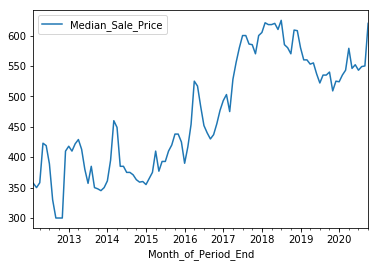

In [30]:
#belltown_df["Median Sale Price","Year"].plot()

belltown_df.plot(y="Median_Sale_Price", x="Month_of_Period_End", kind="line")

In [31]:
from statsmodels.tsa.stattools import adfuller
adfuller(belltown_df.Median_Sale_Price)

(-0.7513717688393351,
 0.8329907730802781,
 3,
 101,
 {'1%': -3.4968181663902103,
  '5%': -2.8906107514600103,
  '10%': -2.5822770483285953},
 833.365488387235)

In [32]:
belltown_df['Returns'] = belltown_df.Median_Sale_Price.pct_change()
belltown_df = belltown_df.dropna()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
train = belltown_df.iloc[:94,:] 
test = belltown_df.iloc[95:,:]

Comparison_1 = pd.DataFrame()
#Comparison.index = test.index
Comparison_1["Original"] = (test.loc[:, 'Returns'])
Returns = train.loc[:, 'Returns']
Comparison_1

,Original
Region,
Belltown,0.020992
Belltown,0.014953
Belltown,0.066298
Belltown,-0.056995
Belltown,0.010989
Belltown,-0.016304
Belltown,0.011050
Belltown,0.001821
Belltown,0.127273


In [34]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(Returns.values, order=(1,1))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   94
Model:                     ARMA(1, 1)   Log Likelihood                 122.306
Method:                       css-mle   S.D. of innovations              0.066
Date:                Fri, 04 Dec 2020   AIC                           -236.611
Time:                        15:19:58   BIC                           -226.438
Sample:                             0   HQIC                          -232.502
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0062      0.008      0.788      0.431      -0.009       0.022
ar.L1.y        0.0027      0.360      0.007      0.994      -0.702       0.708
ma.L1.y        0.1585      0.345      0.459      0.646      -0.518       0.835
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          371.7613           +0.0000j          371.7613            0.0000
MA.1           -6.3098           +0.0000j            6.3098            0.5000
-----------------------------------------------------------------------------
"""

In [35]:
predicted_arma = results.forecast(steps=9)[0]
Comparison_1["Arma"] = predicted_arma
Comparison_1

,Original,Arma
Region,,
Belltown,0.020992,0.011920
Belltown,0.014953,0.006226
Belltown,0.066298,0.006211
Belltown,-0.056995,0.006211
Belltown,0.010989,0.006211
Belltown,-0.016304,0.006211
Belltown,0.011050,0.006211
Belltown,0.001821,0.006211
Belltown,0.127273,0.006211


In [36]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Returns, order=(1, 1, 1))
results = model.fit()
results.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Returns   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 118.367
Method:                       css-mle   S.D. of innovations              0.066
Date:                Fri, 04 Dec 2020   AIC                           -228.734
Time:                        15:19:58   BIC                           -218.603
Sample:                             1   HQIC                          -224.643
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0001      0.000     -0.373      0.709      -0.001       0.000
ar.L1.D.Returns     0.1615      0.103      1.569      0.117      -0.040       0.363
ma.L1.D.Returns    -1.0000      0.028    -35.159      0.000      -1.056      -0.944
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            6.1910           +0.0000j            6.1910            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [37]:
predicted_arima = results.forecast(steps=9)[0]
Comparison_1["Arima"] = predicted_arma
Comparison_1

,Original,Arma,Arima
Region,,,
Belltown,0.020992,0.011920,0.011920
Belltown,0.014953,0.006226,0.006226
Belltown,0.066298,0.006211,0.006211
Belltown,-0.056995,0.006211,0.006211
Belltown,0.010989,0.006211,0.006211
Belltown,-0.016304,0.006211,0.006211
Belltown,0.011050,0.006211,0.006211
Belltown,0.001821,0.006211,0.006211
Belltown,0.127273,0.006211,0.006211


In [38]:
from arch import arch_model
model = arch_model(Returns, mean="Zero", vol="GARCH", p=1, q=1)
res = model.fit(disp="off")
res.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004452. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.011
Vol Model:                      GARCH   Log-Likelihood:                130.361
Distribution:                  Normal   AIC:                          -254.722
Method:            Maximum Likelihood   BIC:                          -247.092
                                        No. Observations:                   94
Date:                Fri, Dec 04 2020   Df Residuals:                       91
Time:                        15:20:00   Df Model:                            3
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      8.9813e-05  2.083e-04      0.431      0.666 [-3.185e-04,4.982e-04]
alpha[1]       0.1000  4.951e-02      2.020  4.340e-02    [2.963e-03,  0.197]
beta[1]        0.8800  4.973e-02     17.697  4.399e-70      [  0.783,  0.977]
=============================================================================

Covariance estimator: robust
"""

In [39]:
import numpy as np

forecast_horizon = 9
garch = res.forecast(horizon=forecast_horizon)
intermediate = np.sqrt(garch.variance.dropna() * 252)
final = intermediate.dropna().T
final.columns = ["Garch"]
final.index = Comparison_1.index
Comparison_1["Garch"] = final["Garch"]

In [40]:
Comparison_1

,Original,Arma,Arima,Garch
Region,,,,
Belltown,0.020992,0.011920,0.011920,0.636742
Belltown,0.014953,0.006226,0.006226,0.648047
Belltown,0.066298,0.006211,0.006211,0.658937
Belltown,-0.056995,0.006211,0.006211,0.669438
Belltown,0.010989,0.006211,0.006211,0.679571
Belltown,-0.016304,0.006211,0.006211,0.689357
Belltown,0.011050,0.006211,0.006211,0.698815
Belltown,0.001821,0.006211,0.006211,0.707960
Belltown,0.127273,0.006211,0.006211,0.716810


# low std 2

In [41]:
broadway_df = neighborhood_df.loc[neighborhood_df.index == " Broadway"]
broadway_df.head()

,Month_of_Period_End,Median_Sale_Price,Median_Sale_Price_MoM,Median_Sale_Price_YoY,Homes_Sold,Homes_Sold_MoM,Homes_Sold_YoY,New_Listings,New_Listings_MoM,New_Listings_YoY,Inventory,Inventory_MoM,Inventory_YoY,Days_on_Market,Days_on_Market_MoM,Days_on_Market_YoY,Average_Sale_To_List,Average_Sale_To_List_MoM,Average_Sale_To_List_YoY
Region,,,,,,,,,,,,,,,,,,,
Broadway,February 2012,265,1.0,-28.4,59,9.3,3.5,67,3.1,-1.5,56,-9.7,-49.5,47.0,0.0,-99.0,96.8,-0.3,1.2
Broadway,March 2012,260,-2.1,-13.5,68,15.3,28.3,71,6.0,-22.8,54,-3.6,-48.6,34.0,-13.0,-116.0,97.1,0.3,1.8
Broadway,April 2012,305,17.5,-9.6,72,5.9,24.1,83,16.9,-17.8,61,13.0,-35.8,47.0,13.0,-84.0,96.3,-0.8,-2.7
Broadway,May 2012,315,3.3,-1.3,79,9.7,2.6,95,14.5,-6.9,54,-11.5,-47.1,30.0,-17.0,-58.0,97.4,1.1,-1.4
Broadway,June 2012,290,-7.9,-13.4,87,10.1,10.1,98,3.2,5.4,62,14.8,-43.6,22.0,-8.0,-26.0,98.3,0.9,-1.0


In [42]:
broadway_df['Month_of_Period_End'] = pd.to_datetime(broadway_df['Month_of_Period_End'], infer_datetime_format=True)

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


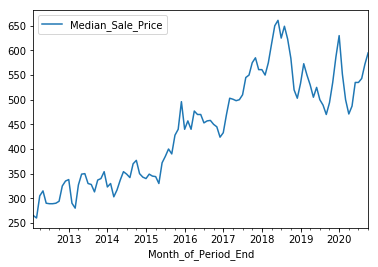

In [43]:
broadway_df.plot(y="Median_Sale_Price", x="Month_of_Period_End", kind="line")

In [44]:
adfuller(broadway_df.Median_Sale_Price)

(-0.9342852020083348,
 0.7764722818571573,
 3,
 101,
 {'1%': -3.4968181663902103,
  '5%': -2.8906107514600103,
  '10%': -2.5822770483285953},
 840.6197626260614)

In [45]:
broadway_df['Returns'] = broadway_df.Median_Sale_Price.pct_change()
broadway_df = broadway_df.dropna()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
train = broadway_df.iloc[:94,:] 
test = broadway_df.iloc[95:,:]

Comparison_2 = pd.DataFrame()
#Comparison.index = test.index
Comparison_2["Original"] = (test.loc[:, 'Returns'])
Returns = train.loc[:, 'Returns']
Comparison_2

,Original
Region,
Broadway,-0.123810
Broadway,-0.094203
Broadway,-0.058000
Broadway,0.033970
Broadway,0.098563
Broadway,0.000000
Broadway,0.014953
Broadway,0.053407
Broadway,0.040210


In [47]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(Returns.values, order=(1,1))
results = model.fit()

results.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   94
Model:                     ARMA(1, 1)   Log Likelihood                 134.501
Method:                       css-mle   S.D. of innovations              0.058
Date:                Fri, 04 Dec 2020   AIC                           -261.003
Time:                        15:20:02   BIC                           -250.829
Sample:                             0   HQIC                          -256.893
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0101      0.006      1.700      0.089      -0.002       0.022
ar.L1.y       -1.0000      0.013    -74.749      0.000      -1.026      -0.974
ma.L1.y        1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0000           +0.0000j            1.0000            0.5000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

In [48]:
predicted_arma = results.forecast(steps=9)[0]
Comparison_2["Arma"] = predicted_arma
Comparison_2

,Original,Arma
Region,,
Broadway,-0.123810,0.010145
Broadway,-0.094203,0.010144
Broadway,-0.058000,0.010145
Broadway,0.033970,0.010144
Broadway,0.098563,0.010145
Broadway,0.000000,0.010144
Broadway,0.014953,0.010145
Broadway,0.053407,0.010144
Broadway,0.040210,0.010145


In [49]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Returns, order=(1, 1, 1))
results = model.fit()
results.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Returns   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 130.508
Method:                       css-mle   S.D. of innovations              0.058
Date:                Fri, 04 Dec 2020   AIC                           -253.016
Time:                        15:20:02   BIC                           -242.886
Sample:                             1   HQIC                          -248.926
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.179e-05      0.000     -0.395      0.693      -0.001       0.000
ar.L1.D.Returns     0.0498      0.105      0.473      0.637      -0.157       0.256
ma.L1.D.Returns    -0.9999      0.028    -35.460      0.000      -1.055      -0.945
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           20.0821           +0.0000j           20.0821            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [50]:
predicted_arima = results.forecast(steps=9)[0]
Comparison_2["Arima"] = predicted_arma
Comparison_2

,Original,Arma,Arima
Region,,,
Broadway,-0.123810,0.010145,0.010145
Broadway,-0.094203,0.010144,0.010144
Broadway,-0.058000,0.010145,0.010145
Broadway,0.033970,0.010144,0.010144
Broadway,0.098563,0.010145,0.010145
Broadway,0.000000,0.010144,0.010144
Broadway,0.014953,0.010145,0.010145
Broadway,0.053407,0.010144,0.010144
Broadway,0.040210,0.010145,0.010145


In [51]:
from arch import arch_model
model = arch_model(Returns, mean="Zero", vol="GARCH", p=1, q=1)
res = model.fit(disp="off")
res.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.003347. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.011
Vol Model:                      GARCH   Log-Likelihood:                134.856
Distribution:                  Normal   AIC:                          -263.713
Method:            Maximum Likelihood   BIC:                          -256.083
                                        No. Observations:                   94
Date:                Fri, Dec 04 2020   Df Residuals:                       91
Time:                        15:20:02   Df Model:                            3
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      9.1256e-05  3.486e-05      2.618  8.857e-03 [2.292e-05,1.596e-04]
alpha[1]       0.0000  5.109e-02      0.000      1.000     [ -0.100,  0.100]
beta[1]        0.9640  5.814e-02     16.580  9.765e-62     [  0.850,  1.078]
============================================================================

Covariance estimator: robust
"""

In [52]:
import numpy as np

forecast_horizon = 9
garch = res.forecast(horizon=forecast_horizon)
intermediate = np.sqrt(garch.variance.dropna() * 252)
final = intermediate.dropna().T
final.columns = ["Garch"]
final.index = Comparison_2.index
Comparison_2["Garch"] = final["Garch"]

In [53]:
Comparison_2

,Original,Arma,Arima,Garch
Region,,,,
Broadway,-0.123810,0.010145,0.010145,0.811619
Broadway,-0.094203,0.010144,0.010144,0.811174
Broadway,-0.058000,0.010145,0.010145,0.810744
Broadway,0.033970,0.010144,0.010144,0.810330
Broadway,0.098563,0.010145,0.010145,0.809931
Broadway,0.000000,0.010144,0.010144,0.809545
Broadway,0.014953,0.010145,0.010145,0.809174
Broadway,0.053407,0.010144,0.010144,0.808815
Broadway,0.040210,0.010145,0.010145,0.808470


# High std 1

In [54]:
laurelhurst_df = neighborhood_df.loc[neighborhood_df.index == " Laurelhurst"]
laurelhurst_df.head()

,Month_of_Period_End,Median_Sale_Price,Median_Sale_Price_MoM,Median_Sale_Price_YoY,Homes_Sold,Homes_Sold_MoM,Homes_Sold_YoY,New_Listings,New_Listings_MoM,New_Listings_YoY,Inventory,Inventory_MoM,Inventory_YoY,Days_on_Market,Days_on_Market_MoM,Days_on_Market_YoY,Average_Sale_To_List,Average_Sale_To_List_MoM,Average_Sale_To_List_YoY
Region,,,,,,,,,,,,,,,,,,,
Laurelhurst,February 2012,864,2.9,-1.1,10,-16.7,-9.1,8,-11.1,-27.3,9,12.5,-25.0,32.0,5.0,-76.0,97.6,0.9,1.6
Laurelhurst,March 2012,953,10.3,9.0,10,0.0,11.1,12,50.0,-40.0,10,11.1,-28.6,90.0,58.0,-19.0,95.6,-2.0,3.1
Laurelhurst,April 2012,1013,6.3,18.4,8,-20.0,-57.9,19,58.3,-20.8,14,40.0,7.7,64.0,-26.0,8.0,94.4,-1.2,-2.0
Laurelhurst,May 2012,886,-12.5,11.4,9,12.5,-50.0,21,10.5,-22.2,15,7.1,-16.7,72.0,8.0,43.0,95.2,0.8,-2.9
Laurelhurst,June 2012,738,-16.8,-7.2,11,22.2,-45.0,21,0.0,-16.0,15,0.0,-31.8,30.0,-42.0,21.0,98.0,2.8,-1.5


In [55]:
laurelhurst_df['Month_of_Period_End'] = pd.to_datetime(laurelhurst_df['Month_of_Period_End'], infer_datetime_format=True)

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


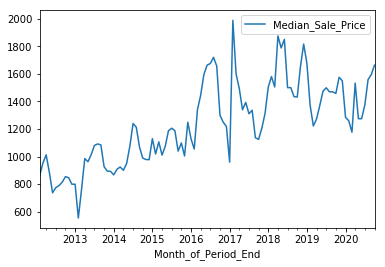

In [56]:
laurelhurst_df.plot(y="Median_Sale_Price", x="Month_of_Period_End", kind="line")

In [57]:
adfuller(laurelhurst_df.Median_Sale_Price)

(-2.95278851866222,
 0.039544807756693945,
 0,
 104,
 {'1%': -3.4948504603223145,
  '5%': -2.889758398668639,
  '10%': -2.5818220155325444},
 1193.0531672015927)

In [58]:
laurelhurst_df['Returns'] = laurelhurst_df.Median_Sale_Price.pct_change()
laurelhurst_df = laurelhurst_df.dropna()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
train = laurelhurst_df.iloc[:94,:] 
test = laurelhurst_df.iloc[95:,:]

Comparison_3 = pd.DataFrame()
#Comparison.index = test.index
Comparison_3["Original"] = (test.loc[:, 'Returns'])
Returns = train.loc[:, 'Returns']
Comparison_3

,Original
Region,
Laurelhurst,-0.019455
Laurelhurst,-0.065873
Laurelhurst,0.302464
Laurelhurst,-0.168297
Laurelhurst,0.000000
Laurelhurst,0.078431
Laurelhurst,0.133091
Laurelhurst,0.023748
Laurelhurst,0.042633


In [61]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(Returns.values, order=(1,1))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   94
Model:                     ARMA(1, 1)   Log Likelihood                  50.069
Method:                       css-mle   S.D. of innovations              0.140
Date:                Fri, 04 Dec 2020   AIC                            -92.139
Time:                        15:21:07   BIC                            -81.966
Sample:                             0   HQIC                           -88.030
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0186      0.001     14.508      0.000       0.016       0.021
ar.L1.y        0.6102      0.084      7.244      0.000       0.445       0.775
ma.L1.y       -1.0000      0.033    -30.240      0.000      -1.065      -0.935
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6387           +0.0000j            1.6387            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [62]:
predicted_arma = results.forecast(steps=9)[0]
Comparison_3["Arma"] = predicted_arma
Comparison_3

,Original,Arma
Region,,
Laurelhurst,-0.019455,0.070194
Laurelhurst,-0.065873,0.050074
Laurelhurst,0.302464,0.037796
Laurelhurst,-0.168297,0.030303
Laurelhurst,0.000000,0.025731
Laurelhurst,0.078431,0.022941
Laurelhurst,0.133091,0.021238
Laurelhurst,0.023748,0.020199
Laurelhurst,0.042633,0.019565


In [63]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Returns, order=(1, 1, 1))
results = model.fit()
results.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Returns   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  39.432
Method:                       css-mle   S.D. of innovations              0.154
Date:                Fri, 04 Dec 2020   AIC                            -70.864
Time:                        15:21:22   BIC                            -60.734
Sample:                             1   HQIC                           -66.774
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.256e-06      0.001     -0.002      0.998      -0.001       0.001
ar.L1.D.Returns    -0.1669      0.102     -1.635      0.102      -0.367       0.033
ma.L1.D.Returns    -1.0000      0.028    -35.804      0.000      -1.055      -0.945
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.9923           +0.0000j            5.9923            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [64]:
predicted_arima = results.forecast(steps=9)[0]
Comparison_3["Arima"] = predicted_arma
Comparison_3

,Original,Arma,Arima
Region,,,
Laurelhurst,-0.019455,0.070194,0.070194
Laurelhurst,-0.065873,0.050074,0.050074
Laurelhurst,0.302464,0.037796,0.037796
Laurelhurst,-0.168297,0.030303,0.030303
Laurelhurst,0.000000,0.025731,0.025731
Laurelhurst,0.078431,0.022941,0.022941
Laurelhurst,0.133091,0.021238,0.021238
Laurelhurst,0.023748,0.020199,0.020199
Laurelhurst,0.042633,0.019565,0.019565


In [65]:
from arch import arch_model
model = arch_model(Returns, mean="Zero", vol="GARCH", p=1, q=1)
res = model.fit(disp="off")
res.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0243. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.011
Vol Model:                      GARCH   Log-Likelihood:                57.2161
Distribution:                  Normal   AIC:                          -108.432
Method:            Maximum Likelihood   BIC:                          -100.802
                                        No. Observations:                   94
Date:                Fri, Dec 04 2020   Df Residuals:                       91
Time:                        15:21:33   Df Model:                            3
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      9.3084e-03  2.651e-03      3.511  4.467e-04 [4.112e-03,1.450e-02]
alpha[1]       0.9828      0.679      1.448      0.148     [ -0.348,  2.314]
beta[1]    2.2647e-09  6.200e-02  3.653e-08      1.000     [ -0.122,  0.122]
============================================================================

Covariance estimator: robust
"""

In [66]:
import numpy as np

forecast_horizon = 9
garch = res.forecast(horizon=forecast_horizon)
intermediate = np.sqrt(garch.variance.dropna() * 252)
final = intermediate.dropna().T
final.columns = ["Garch"]
final.index = Comparison_3.index
Comparison_3["Garch"] = final["Garch"]

In [67]:
Comparison_3

,Original,Arma,Arima,Garch
Region,,,,
Laurelhurst,-0.019455,0.070194,0.070194,1.551812
Laurelhurst,-0.065873,0.050074,0.050074,2.170832
Laurelhurst,0.302464,0.037796,0.037796,2.641468
Laurelhurst,-0.168297,0.030303,0.030303,3.033699
Laurelhurst,0.000000,0.025731,0.025731,3.375070
Laurelhurst,0.078431,0.022941,0.022941,3.679854
Laurelhurst,0.133091,0.021238,0.021238,3.956595
Laurelhurst,0.023748,0.020199,0.020199,4.210903
Laurelhurst,0.042633,0.019565,0.019565,4.446696


# high std 2

In [68]:
madisonpark_df = neighborhood_df.loc[neighborhood_df.index == " Madison Park"]
madisonpark_df.head()

,Month_of_Period_End,Median_Sale_Price,Median_Sale_Price_MoM,Median_Sale_Price_YoY,Homes_Sold,Homes_Sold_MoM,Homes_Sold_YoY,New_Listings,New_Listings_MoM,New_Listings_YoY,Inventory,Inventory_MoM,Inventory_YoY,Days_on_Market,Days_on_Market_MoM,Days_on_Market_YoY,Average_Sale_To_List,Average_Sale_To_List_MoM,Average_Sale_To_List_YoY
Region,,,,,,,,,,,,,,,,,,,
Madison Park,February 2012,1038,3.8,15.3,21,-8.7,-8.7,25,8.7,56.3,35,-2.8,-30.0,130.0,-40.0,48.0,91.5,-1.5,-1.5
Madison Park,March 2012,994,-4.2,36.1,18,-14.3,-14.3,39,56.0,56.0,42,20.0,-22.2,94.0,-36.0,-30.0,92.7,1.2,0.8
Madison Park,April 2012,1225,23.3,59.3,23,27.8,15.0,47,20.5,20.5,44,4.8,-30.2,78.0,-17.0,-126.0,94.3,1.6,2.7
Madison Park,May 2012,872,-28.8,8.2,32,39.1,23.1,58,23.4,5.5,56,27.3,-21.1,45.0,-33.0,-149.0,96.3,2.0,2.6
Madison Park,June 2012,840,-3.7,-19.7,32,0.0,39.1,53,-8.6,-5.4,61,8.9,-9.0,20.0,-26.0,-141.0,96.9,0.7,3.6


In [69]:
madisonpark_df['Month_of_Period_End'] = pd.to_datetime(madisonpark_df['Month_of_Period_End'], infer_datetime_format=True)

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


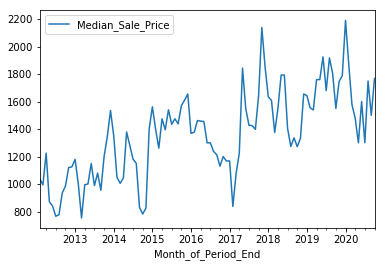

In [70]:
madisonpark_df.plot(y="Median_Sale_Price", x="Month_of_Period_End", kind="line")

In [71]:
adfuller(madisonpark_df.Median_Sale_Price)

(-1.9390312863332095,
 0.31392809436925534,
 4,
 100,
 {'1%': -3.497501033, '5%': -2.89090644, '10%': -2.5824349},
 1214.1208699417962)

In [72]:
madisonpark_df['Returns'] = madisonpark_df.Median_Sale_Price.pct_change()
madisonpark_df = madisonpark_df.dropna()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
train = madisonpark_df.iloc[:94,:] 
test = madisonpark_df.iloc[95:,:]

Comparison_3 = pd.DataFrame()
#Comparison.index = test.index
Comparison_3["Original"] = (test.loc[:, 'Returns'])
Returns = train.loc[:, 'Returns']
Comparison_3

,Original
Region,
Madison Park,-0.146052
Madison Park,-0.156601
Madison Park,-0.062104
Madison Park,-0.121622
Madison Park,0.230769
Madison Park,-0.187500
Madison Park,0.346154
Madison Park,-0.142857
Madison Park,0.178667


In [74]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(Returns.values, order=(1,1))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   94
Model:                     ARMA(1, 1)   Log Likelihood                  46.976
Method:                       css-mle   S.D. of innovations              0.145
Date:                Fri, 04 Dec 2020   AIC                            -85.952
Time:                        15:24:53   BIC                            -75.779
Sample:                             0   HQIC                           -81.843
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0182      0.002     11.433      0.000       0.015       0.021
ar.L1.y        0.6818      0.078      8.796      0.000       0.530       0.834
ma.L1.y       -1.0000      0.030    -32.891      0.000      -1.060      -0.940
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4667           +0.0000j            1.4667            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [75]:
predicted_arma = results.forecast(steps=9)[0]
Comparison_3["Arma"] = predicted_arma
Comparison_3

,Original,Arma
Region,,
Madison Park,-0.146052,0.036308
Madison Park,-0.156601,0.030544
Madison Park,-0.062104,0.026614
Madison Park,-0.121622,0.023934
Madison Park,0.230769,0.022107
Madison Park,-0.187500,0.020861
Madison Park,0.346154,0.020012
Madison Park,-0.142857,0.019433
Madison Park,0.178667,0.019038


In [76]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Returns, order=(1, 1, 1))
results = model.fit()
results.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Returns   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  36.858
Method:                       css-mle   S.D. of innovations              0.159
Date:                Fri, 04 Dec 2020   AIC                            -65.716
Time:                        15:25:12   BIC                            -55.586
Sample:                             1   HQIC                           -61.626
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.113e-05      0.001     -0.036      0.972      -0.001       0.001
ar.L1.D.Returns    -0.0196      0.104     -0.189      0.850      -0.223       0.184
ma.L1.D.Returns    -0.9999      0.027    -36.404      0.000      -1.054      -0.946
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -51.0206           +0.0000j           51.0206            0.5000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [77]:
predicted_arima = results.forecast(steps=9)[0]
Comparison_3["Arima"] = predicted_arma
Comparison_3

,Original,Arma,Arima
Region,,,
Madison Park,-0.146052,0.036308,0.036308
Madison Park,-0.156601,0.030544,0.030544
Madison Park,-0.062104,0.026614,0.026614
Madison Park,-0.121622,0.023934,0.023934
Madison Park,0.230769,0.022107,0.022107
Madison Park,-0.187500,0.020861,0.020861
Madison Park,0.346154,0.020012,0.020012
Madison Park,-0.142857,0.019433,0.019433
Madison Park,0.178667,0.019038,0.019038


In [78]:
from arch import arch_model
model = arch_model(Returns, mean="Zero", vol="GARCH", p=1, q=1)
res = model.fit(disp="off")
res.summary()

C:\Users\Sravani\anaconda3\envs\pyvizenv\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02498. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.011
Vol Model:                      GARCH   Log-Likelihood:                40.0808
Distribution:                  Normal   AIC:                          -74.1615
Method:            Maximum Likelihood   BIC:                          -66.5316
                                        No. Observations:                   94
Date:                Fri, Dec 04 2020   Df Residuals:                       91
Time:                        15:25:12   Df Model:                            3
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0000  6.311e-04      0.000      1.000 [-1.237e-03,1.237e-03]
alpha[1]   1.1620e-09  1.529e-02  7.597e-08      1.000 [-2.998e-02,2.998e-02]
beta[1]        0.9964  2.080e-02     47.908      0.000      [  0.956,  1.037]
=============================================================================

Covariance estimator: robust
"""

In [79]:
import numpy as np

forecast_horizon = 9
garch = res.forecast(horizon=forecast_horizon)
intermediate = np.sqrt(garch.variance.dropna() * 252)
final = intermediate.dropna().T
final.columns = ["Garch"]
final.index = Comparison_3.index
Comparison_3["Garch"] = final["Garch"]

In [80]:
Comparison_3

,Original,Arma,Arima,Garch
Region,,,,
Madison Park,-0.146052,0.036308,0.036308,2.222449
Madison Park,-0.156601,0.030544,0.030544,2.218406
Madison Park,-0.062104,0.026614,0.026614,2.214371
Madison Park,-0.121622,0.023934,0.023934,2.210343
Madison Park,0.230769,0.022107,0.022107,2.206323
Madison Park,-0.187500,0.020861,0.020861,2.202310
Madison Park,0.346154,0.020012,0.020012,2.198304
Madison Park,-0.142857,0.019433,0.019433,2.194305
Madison Park,0.178667,0.019038,0.019038,2.190314
